In [1]:
import numpy as np 
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dir='/content/drive/MyDrive/cse498r'
import tensorflow as tf
import h5py
import numpy as np
import os
import cv2
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import StandardScaler
%config Completer.use_jedi = False

In [3]:
x_dataset=[]
y_dataset=[]
src=os.listdir('/content/drive/MyDrive/cse498r/normal')
i=0
for filename in src:
    full_file_name='/content/drive/MyDrive/cse498r/normal/'+filename
    x=cv2.imread(full_file_name)
    x=np.array(x,dtype='float32')
    y=0
    y=np.array(y,dtype='float32')
    x=x/255.0
    x=cv2.resize(x,(224,224))
    x_dataset.append(x)
    y_dataset.append(y)
    i=i+1
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [4]:
src=os.listdir('/content/drive/MyDrive/cse498r/pneumonia')
for filename in src:
    full_file_name='/content/drive/MyDrive/cse498r/pneumonia/'+filename
    x=cv2.imread(full_file_name)
    x=np.array(x,dtype='float32')
    y=1
    y=np.array(y,dtype='float32')
    x=x/255.0
    x=cv2.resize(x,(224,224))
    x_dataset.append(x)
    y_dataset.append(y)
    i=i+1
    print(i)

516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629


In [6]:
X_dataset=np.array(x_dataset)
Y_dataset=np.array(y_dataset)
Y_dataset=Y_dataset.reshape((629,1))

In [7]:
from sklearn.utils import shuffle
X_dataset,Y_dataset=shuffle(X_dataset,Y_dataset,random_state=0)

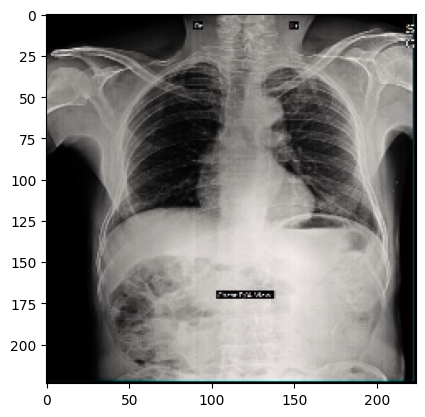

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_dataset[2])
plt.show()

In [10]:
yes_len=0
no_len=0
for i in range(629):
    if Y_dataset[i]==0:
        no_len+=1
    else:
        yes_len+=1
print(yes_len)
print(no_len)

114
515


<Axes: >

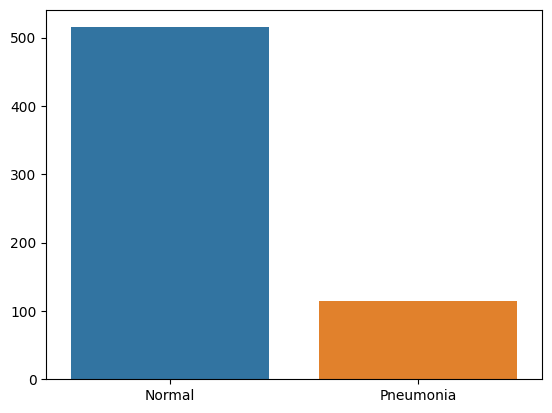

In [11]:
import seaborn as sns
sns.barplot(x=['Normal','Pneumonia'],y=[no_len,yes_len])

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_dataset,Y_dataset,test_size=0.20)

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
folds=list(StratifiedShuffleSplit(n_splits=5,random_state=1).split(x_train,y_train))

In [14]:
nasnet=tf.keras.applications.inception_v3.InceptionV3(include_top=False,input_shape=(224,224,3))
x=tf.keras.layers.Flatten()(nasnet.output)
x=tf.keras.layers.Dense(1)(x)
out=tf.keras.layers.Activation(activation='sigmoid')(x)

model=tf.keras.Model(inputs=nasnet.input,outputs=out)

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

87910968/87910968 [==============================] - 0s 0us/step


In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [16]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc,roc_curve
from matplotlib import pyplot as plt

In [17]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(  rotation_range=8,
                                     width_shift_range=0.03,
                                     height_shift_range=0.03,
                                     shear_range=0.25,
                                     zoom_range=0.45,
                                     horizontal_flip=True)
val_datagen = ImageDataGenerator(zoom_range=0.45)

In [ ]:
History=[]
Prescore=[]
Recall=[]
F1=[]
Sensspeci=[]
Roc_auc=[]
for j,(train_idx,val_idx) in enumerate(folds):
    print("Fold "+str(j+1))

    x_train=X_dataset[train_idx]
    y_train=Y_dataset[train_idx]
    x_val=X_dataset[val_idx]
    y_val=Y_dataset[val_idx]
    history=model.fit(train_datagen.flow(x_train,y_train),batch_size=32,epochs=50,validation_data=(x_val,y_val))
    y_predict=model.predict(x_val)
    Y_predict=np.float32(y_predict>0.50)
    l=len(y_val)
    Y_predict=np.reshape(Y_predict,(l,1))
    prescore=precision_score(y_val,Y_predict,average='binary')
    recaller=recall_score(y_val,Y_predict,average='binary')
    score=f1_score(y_val,Y_predict,average='binary')
    sensitivity=sensitivity_specificity_support(y_val,Y_predict,average='binary')
    print("Precision: ",prescore)
    print("Recall: ",recaller)
    print("F1-score ",score)
    print("Sensitivity ",sensitivity)
    History.append(history)
    Prescore.append(prescore)
    F1.append(score)
    Recall.append(recaller)
    Sensspeci.append(sensitivity)
    fpr, tpr, thresholds = roc_curve(y_val,y_predict)
    auc = roc_auc_score(y_val, y_predict)
    print("Precision: ",prescore)
    print("Recall: ",recaller)
    print("F1-score ",score)
    print("Sensitivity ",sensitivity)
    print("AUC: ",auc)

Fold 1
Epoch 1/50
15/15 [==============================] - 7s 420ms/step - loss: 1.1715 - accuracy: 0.7655 - val_loss: 68985.7891 - val_accuracy: 0.8235
Epoch 2/50
15/15 [==============================] - 8s 508ms/step - loss: 1.2911 - accuracy: 0.8031 - val_loss: 4267.4399 - val_accuracy: 0.1765
Epoch 3/50
15/15 [==============================] - 7s 421ms/step - loss: 0.6361 - accuracy: 0.8031 - val_loss: 4.0831 - val_accuracy: 0.8235
Epoch 4/50
15/15 [==============================] - 9s 574ms/step - loss: 0.7955 - accuracy: 0.8097 - val_loss: 9213.5820 - val_accuracy: 0.8235
Epoch 5/50
15/15 [==============================] - 6s 404ms/step - loss: 1.1501 - accuracy: 0.8031 - val_loss: 19.1521 - val_accuracy: 0.7843
Epoch 6/50
15/15 [==============================] - 8s 493ms/step - loss: 0.8433 - accuracy: 0.8053 - val_loss: 13.3482 - val_accuracy: 0.7647
Epoch 7/50
15/15 [==============================] - 7s 429ms/step - loss: 0.7352 - accuracy: 0.8009 - val_loss: 100.8082 - val_ac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/50
15/15 [==============================] - 7s 430ms/step - loss: 0.3855 - accuracy: 0.8230 - val_loss: 46.6685 - val_accuracy: 0.8627
Epoch 2/50
15/15 [==============================] - 6s 401ms/step - loss: 0.3835 - accuracy: 0.8053 - val_loss: 18.6762 - val_accuracy: 0.8824
Epoch 3/50
15/15 [==============================] - 7s 414ms/step - loss: 0.3591 - accuracy: 0.8164 - val_loss: 257.0474 - val_accuracy: 0.8824
Epoch 4/50
15/15 [==============================] - 8s 551ms/step - loss: 0.3456 - accuracy: 0.8097 - val_loss: 17.2181 - val_accuracy: 0.9020
Epoch 5/50
15/15 [==============================] - 6s 402ms/step - loss: 0.3666 - accuracy: 0.8319 - val_loss: 0.3135 - val_accuracy: 0.8627
Epoch 6/50
15/15 [==============================] - 8s 556ms/step - loss: 0.3468 - accuracy: 0.8075 - val_loss: 0.2256 - val_accuracy: 0.9020
Epoch 7/50
15/15 [==============================] - 6s 394ms/step - loss: 0.3379 - accuracy: 0.8186 - val_loss: 0.2804 - val_accuracy: 0.8627
E